In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data/qualifying.csv')

data.head()

,grid,driver,constructor,season,round,qual_time,q_delta
0,1,Valtteri Bottas BOT,Mercedes,2020,1,62.939,0.000
1,2,Max Verstappen VER,Red Bull Racing Honda,2020,1,63.477,0.538
2,3,Lando Norris NOR,McLaren Renault,2020,1,63.626,0.687
3,4,Alexander Albon ALB,Red Bull Racing Honda,2020,1,63.868,0.929
4,5,Lewis Hamilton HAM,Mercedes,2020,1,62.951,0.012


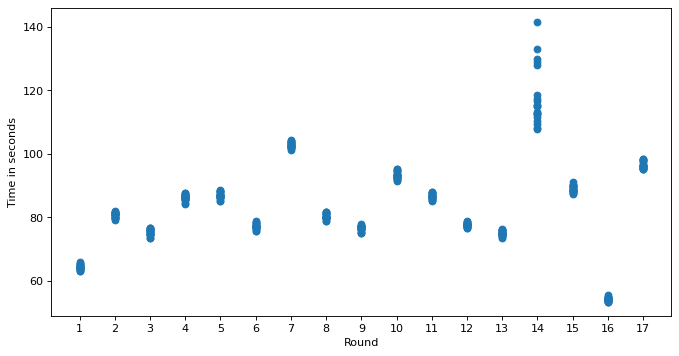

In [3]:
s_2020 = data.query('season == 2020')
q_times_by_round = s_2020.groupby('round').agg('qual_time')


x = s_2020['round'].values
y = s_2020['qual_time'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(x))
axs.scatter(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encount

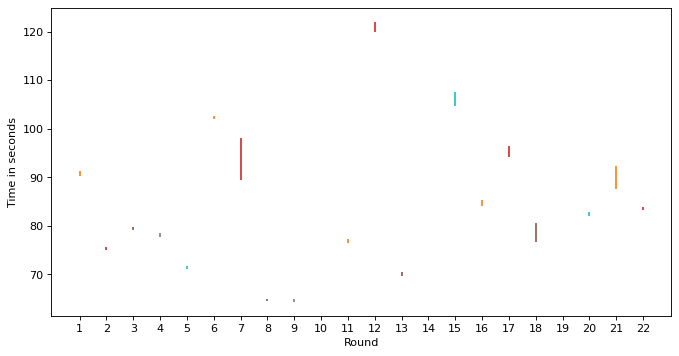

In [4]:
s21 = data.query('season == 2021')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))

for i in range(1, len(np.unique(s21['round'])) + 1):
    r = s21.query('round == @i & qual_time.notnull()')['qual_time'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

In [5]:
s21.query('round == 7')

,grid,driver,constructor,season,round,qual_time,q_delta
459,1,Max Verstappen VER,Red Bull Racing Honda,2021,7,89.990,0.000
460,2,Lewis Hamilton HAM,Mercedes,2021,7,90.248,0.258
461,3,Valtteri Bottas BOT,Mercedes,2021,7,90.376,0.386
462,4,Sergio Perez PER,Red Bull Racing Honda,2021,7,90.445,0.455
463,5,Carlos Sainz SAI,Ferrari,2021,7,90.840,0.850
464,6,Pierre Gasly GAS,AlphaTauri Honda,2021,7,90.868,0.878
465,7,Charles Leclerc LEC,Ferrari,2021,7,90.987,0.997
466,8,Lando Norris NOR,McLaren Mercedes,2021,7,91.252,1.262
467,9,Fernando Alonso ALO,Alpine Renault,2021,7,91.340,1.350
468,10,Daniel Ricciardo RIC,McLaren Mercedes,2021,7,91.382,1.392
